In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

#from tensorflow.keras.models import sequential, load_model 
#from tensorflow.keras.layers import LSTM, Dense, Dropout

import os
import keras
import tensorflow as tf
tf.version



import datetime as dt


In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AAPL (2).csv')
df.head()

,Date,Open,High,Low,eps,p/e,Interest_Rate,Inflation_rate,Close,Adj Close,Volume
0,1/3/2000,0.936384,1.004464,0.907924,11.324009,18.149305,3.411051,1.760000,0.999442,0.853355,535796800
1,1/4/2000,0.966518,0.987723,0.903460,9.778793,17.445471,2.796146,2.488276,0.915179,0.781409,512377600
2,1/5/2000,0.926339,0.987165,0.919643,9.422680,17.327946,2.795518,2.488011,0.928571,0.792844,778321600
3,1/6/2000,0.947545,0.955357,0.848214,7.335150,22.874871,2.794891,2.487746,0.848214,0.724232,767972800
4,1/7/2000,0.861607,0.901786,0.852679,26.008772,2.198084,2.794264,2.487482,0.888393,0.758538,460734400


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df.tail()

,Date,Open,High,Low,eps,p/e,Interest_Rate,Inflation_rate,Close,Adj Close,Volume
5531,12/27/2021,177.089996,180.419998,177.070007,42.058140,-37.265245,0.520334,1.977604,180.330002,179.586868,74919600
5532,12/28/2021,180.160004,181.330002,178.529999,31.325000,21.131936,0.520138,1.977684,179.289993,178.551132,79144300
5533,12/29/2021,179.330002,180.630005,178.139999,249.047619,38.618263,0.519943,1.977764,179.380005,178.640778,62348900
5534,12/30/2021,179.470001,180.570007,178.089996,-17.666667,-14.792230,0.519747,1.977845,178.199997,177.465637,59773000
5535,12/31/2021,178.089996,179.229996,177.259995,-204.706897,19.615712,0.519552,1.977925,177.570007,176.838242,64062300


In [9]:
df1=df.reset_index()['Close']
df1.head()

0    0.999442
1    0.915179
2    0.928571
3    0.848214
4    0.888393
Name: Close, dtype: float64

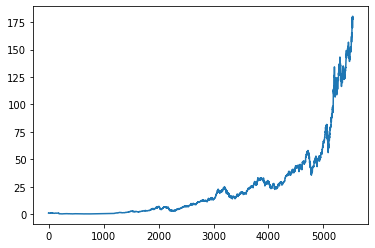

In [10]:
plt.plot(df1)


**Scaling the dataset**

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
df1

array([[0.00424861],
       [0.00378073],
       [0.00385509],
       ...,
       [0.99472504],
       [0.98817293],
       [0.98467484]])

Splitting dataset into train and test split

In [13]:
training_size=int(len(df1)*0.8)
test_size=len(df1)-training_size


In [14]:
training_size, test_size


(4428, 1108)

In [15]:
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]


In [16]:
train_data
len(train_data)

4428

In [17]:
test_data
len(test_data)


1108

In [18]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [19]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape), print(y_train.shape)


(4327, 100)
(4327,)


(None, None)

In [21]:
print(X_test.shape), print(ytest.shape)


(1007, 100)
(1007,)


(None, None)

In [22]:
# reshape input to be [samples, time steps, features] 
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)   #shape[0]=4327, shape[1]=100 
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

**Create LSTM model**

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [24]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))  # input_shape= (x_train.shape[1], 1)
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
#Train the model
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)
model.save('stock_prediction.h5')

Epoch 1/100
68/68 [==============================] - 11s 33ms/step - loss: 3.1793e-04 - val_loss: 0.0013
Epoch 2/100
68/68 [==============================] - 1s 16ms/step - loss: 1.6837e-05 - val_loss: 0.0017
Epoch 3/100
68/68 [==============================] - 1s 16ms/step - loss: 1.7163e-05 - val_loss: 0.0025
Epoch 4/100
68/68 [==============================] - 1s 17ms/step - loss: 1.5713e-05 - val_loss: 0.0017
Epoch 5/100
68/68 [==============================] - 1s 16ms/step - loss: 1.7222e-05 - val_loss: 0.0024
Epoch 6/100
68/68 [==============================] - 1s 16ms/step - loss: 1.5087e-05 - val_loss: 0.0035
Epoch 7/100
68/68 [==============================] - 1s 16ms/step - loss: 1.5527e-05 - val_loss: 0.0032
Epoch 8/100
68/68 [==============================] - 1s 17ms/step - loss: 1.4376e-05 - val_loss: 0.0016
Epoch 9/100
68/68 [==============================] - 1s 17ms/step - loss: 1.2806e-05 - val_loss: 0.0025
Epoch 10/100
68/68 [==============================] - 1s 16ms/s

In [27]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [28]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [29]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))


15.065071078941973

In [30]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

92.41892625690123

In [31]:
### Plotting 
import numpy as np
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict


In [32]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

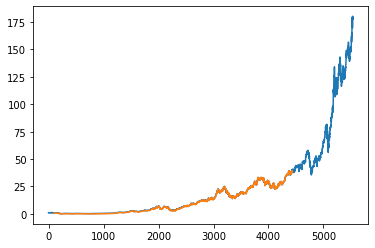

In [33]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)

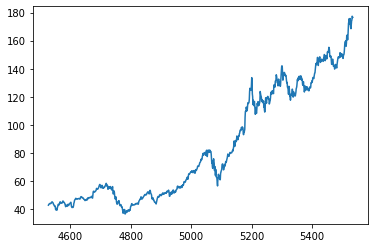

In [34]:
plt.plot(testPredictPlot)
plt.show()

In [35]:
# ### Plotting 
# look_back=100    #timestamps dieako
# trainPredictPlot = np.empty_like(df1)
# trainPredictPlot[:, :] = np.nan
# trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict



In [36]:
# # shift test predictions for plotting
# testPredictPlot = np.empty_like(df1)
# testPredictPlot[:, :] = np.nan
# testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

In [37]:
# # plot baseline and predictions
# plt.plot(scaler.inverse_transform(df1)
# plt.plot(trainPredictPlot)
# plt.show()

In [38]:
len(test_data)


1108

In [39]:
x_input=test_data[1008:].reshape(1,-1)    #taking previous 100 day data 
x_input.shape

(1, 100)

In [40]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [41]:
temp_input


[0.8086017715157645,
 0.8254261472827038,
 0.8265922327658255,
 0.8378084296019568,
 0.8326445477470436,
 0.8113780729798149,
 0.8132659357649573,
 0.8215393418908421,
 0.8299793261045698,
 0.8294795252098056,
 0.8224832788360164,
 0.8179301000141503,
 0.8238159313017752,
 0.8489136354581582,
 0.8417508165491289,
 0.8455265476720168,
 0.8518565094574487,
 0.8554657513341406,
 0.8687364667796984,
 0.8599633486006963,
 0.8541886748710892,
 0.8258703666221577,
 0.8290908874256621,
 0.8211506208176544,
 0.826203511692638,
 0.8248708536742763,
 0.8097122754435758,
 0.7923881765183132,
 0.7951089019796562,
 0.8085462732494981,
 0.8139878019086252,
 0.8144875139617425,
 0.8058809627653775,
 0.7866690066075752,
 0.7917773901962222,
 0.7843924171966423,
 0.7907778772483405,
 0.7712882687337216,
 0.782226907607286,
 0.7871687186606926,
 0.7943315375697222,
 0.7921660279803657,
 0.7916663159272485,
 0.7844479154629087,
 0.7811164036794744,
 0.7969412720511353,
 0.8029380887660871,
 0.812433078641

In [42]:
# # demonstrate prediction for next 30 days

# lst_output=[]
# n_steps=100
# i=0
# while(i<30):
    
#     if(len(temp_input)>100):
#         #print(temp_input)
#         x_input=np.array(temp_input[1:])
#         print("{} day input {}".format(i,x_input))
#         x_input=x_input.reshape(1,-1)
#         x_input = x_input.reshape((1, n_steps, 1))
#         #print(x_input)

#         yhat = model.predict(x_input, verbose=0)
#         print("{} day output {}".format(i,yhat))
#         temp_input.extend(yhat[0].tolist())
#         temp_input=temp_input[1:]
#         #print(temp_input)

#         lst_output.extend(yhat.tolist())
#         i=i+1
#     else:
#         x_input = x_input.reshape((1, n_steps,1))
#         yhat = model.predict(x_input, verbose=0)
#         print(yhat[0])
#         temp_input.extend(yhat[0].tolist())
#         print(len(temp_input))
#         lst_output.extend(yhat.tolist())
#         i=i+1
    

# print(lst_output)

In [43]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [44]:
len(df1)


5536

NameError: ignored

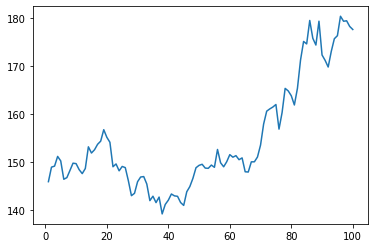

In [45]:
 plt.plot(day_new,scaler.inverse_transform(df1[5436:]))   # last 100 day 
 plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()


In [ ]:
plt.plot(df3)


In [ ]:
! pip install -U keras-tuner


In [ ]:
import keras_tuner
from tensorflow import keras



In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:

(X_train, y_train), (X_test, ytest) = tf.keras.datasets.mnist.load_data()

(X_train.shape, y_train.shape), (X_test.shape, ytest.shape)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train.min(), X_train.max()

In [ ]:
def model_builder(hp):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

  hp_activation = hp.Choice('activation', values=['relu', 'tanh'])
  hp_layer_1 = hp.Int('layer_1', min_value=1, max_value=1000, step=100)
  hp_layer_2 = hp.Int('layer_2', min_value=1, max_value=1000, step=100)
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.add(tf.keras.layers.Dense(units=hp_layer_1, activation=hp_activation))
  model.add(tf.keras.layers.Dense(units=hp_layer_2, activation=hp_activation))
  model.add(tf.keras.layers.Dense(10, activation='softmax'))

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])
  
  return model

In [ ]:
import keras_tuner as kt

tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='dir',
                     project_name='x')

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2,
                    callbacks=[stop_early])

In [ ]:
history.history

In [ ]:
import pandas as pd

pd.DataFrame(history.history)

In [ ]:
model

NameError: ignored